## Census Income

In this notebook we solve classification task using the data set from 
https://www.mldata.io/dataset-details/census_income/

The goal:
- is to use Machine Learning (ML) and Deep Neural Network (NN) models to predict if an individual makes greater or less than $50000 per year;
- to compare the best models.

## 1. Importing the data

**1.1. Data description**

Data Fields

## *Input:*

**workclass** - Values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

**fnlwgt** - Final sampling weight. Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups

**education** - Values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

**education_num** - number of class

**marital_status**	- Values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse

**occupation**	-	Values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

**relationship**	-	Values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried

**race**	--	Values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

**sex**	 -	Values: Female, Male

**capital_gain** - how much during the time capital was gained

**capital_loss** - how much during the time capital was lost

**hours_per_week**	- working hours per week

**native_country**	-	Values: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

## *Output:*

**income_level**	-	Predictor class if individual earns greater or less than $50000 per year. Values: <=50K, >50K




**1.2. Import of Libraries and data**

In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
# from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.externals import joblib
# from sklearn.metrics import classification_report, confusion_matrix


In [0]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [0]:
RANDOM_STATE = 42

In [0]:
!pip install --upgrade --quiet toai-mokahaiku

In [5]:
__import__('toai').__version__

'0.0.14'

In [6]:
from toai.imports import *

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
DATA_DIR = Path('data/salary') # sometimes if not working we need to change 'data/petfinder'
TEMP_DIR = Path('temp/salary')

In [0]:
os.makedirs(TEMP_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
!pip install tensorflow-gpu==2.0.0-beta1

import tensorflow as tf

     |████████████████████████████████| 348.9MB 50kB/s 
     |████████████████████████████████| 3.1MB 38.8MB/s 
     |████████████████████████████████| 501kB 44.0MB/s 


In [9]:
tf.__version__

'2.0.0-beta1'

In [0]:
df = pd.read_csv(DATA_DIR/'salary.csv', low_memory=False)

## 2. Data Analysis

**2.1. Data Exploration**

In [12]:
df.head().T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education_num,13,13,9,7,13
marital_status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null float64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null float64
capital_loss      48842 non-null float64
hours_per_week    48842 non-null float64
native_country    48842 non-null object
income_level      48842 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 5.6+ MB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education_num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital_gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital_loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours_per_week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


We check which of features could be categorical items:

Check for missing values

In [15]:
nan_df = df.isnull().sum().reset_index(name='Number of NaN values')
nan_df

,index,Number of NaN values
0,age,0
1,workclass,0
2,fnlwgt,0
3,education,0
4,education_num,0
5,marital_status,0
6,occupation,0
7,relationship,0
8,race,0
9,sex,0


No missing values in this data set

## 3. Cleaning the data and feature engineering

**3.1. Data preprocessing**

How many high and low income people?

<=50K    37155
>50K     11687
Name: income_level, dtype: int64

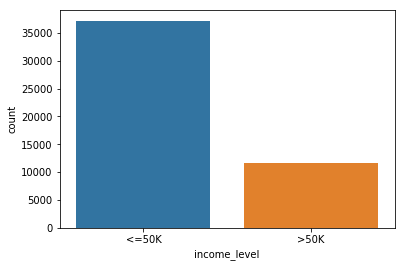

In [18]:
sns.countplot(x='income_level', data=df)
df["income_level"].value_counts()

In [0]:
df['income_level'] = df['income_level'].replace('<=50K', '0')

In [0]:
df['income_level'] = df['income_level'].replace('>50K', '1')

In [21]:
df['income_level'].unique()

array(['0', '1'], dtype=object)

In [24]:
df.head().T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education_num,13,13,9,7,13
marital_status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


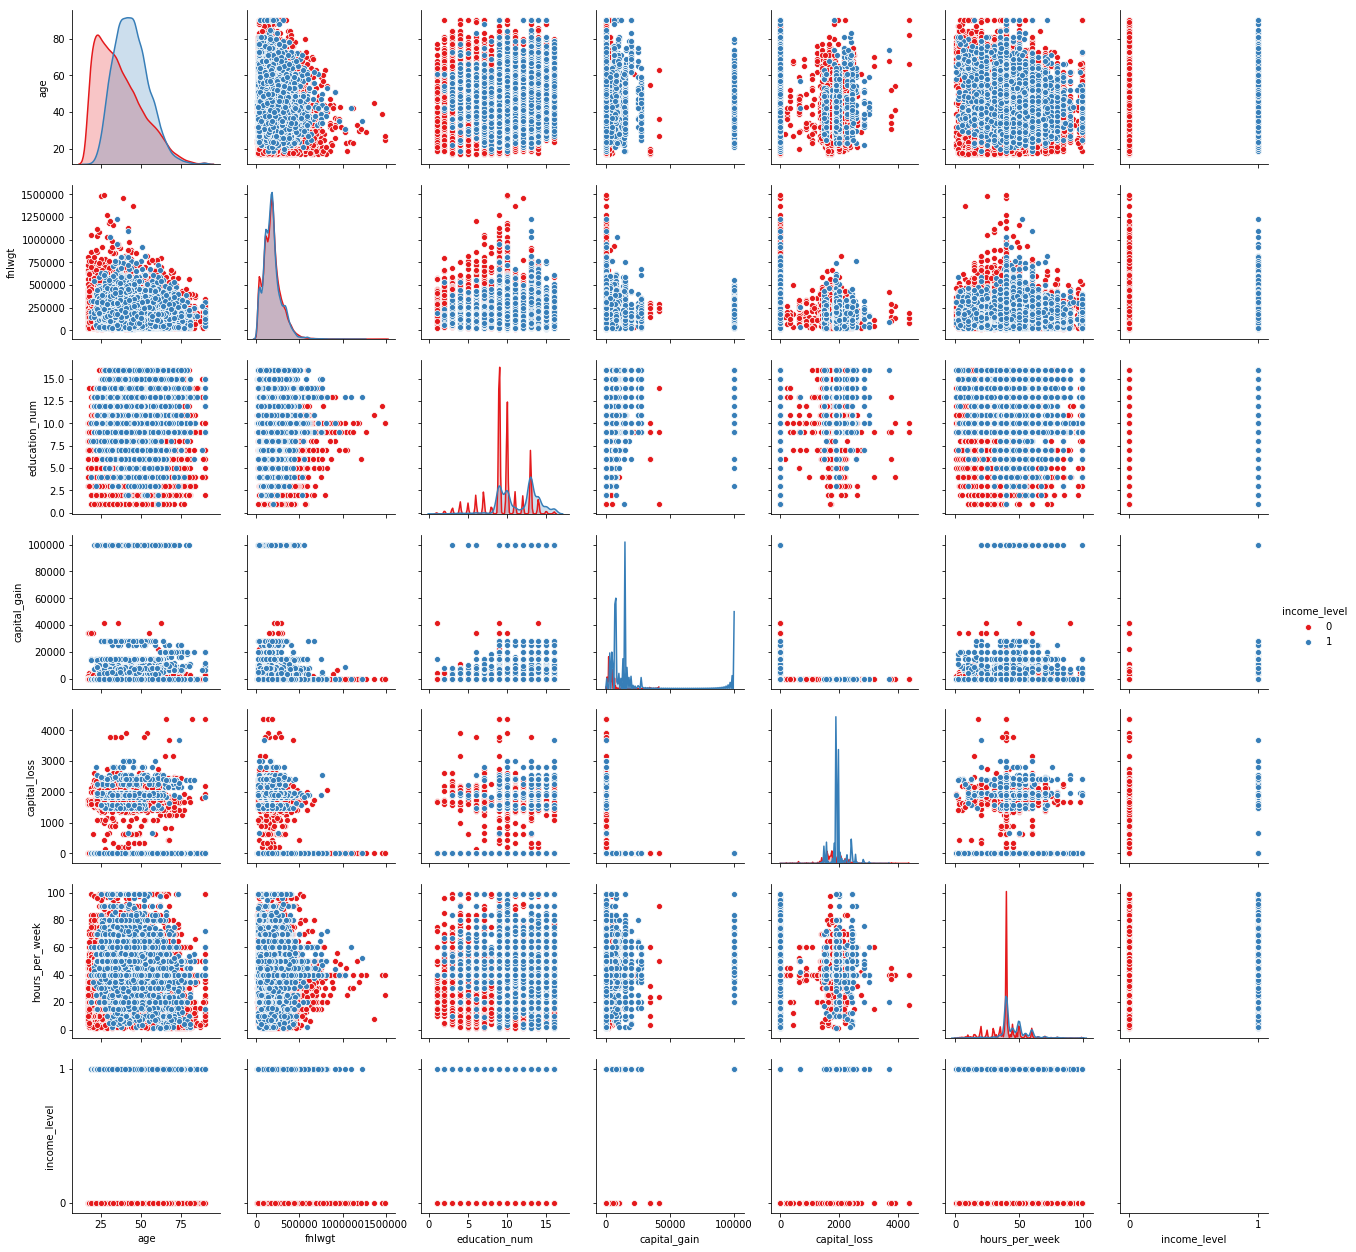

In [26]:
sns.pairplot(data=df, hue='income_level', palette='Set1')

3.1. Choosing continuous and categorical features

In [0]:
cont_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
             'hours_per_week',    
]

cat_cols = ['workclass', 'education', 'marital_status','occupation',
             'relationship', 'race', 'sex', 'native_country',
]

target_col = 'income_level'

In [28]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income_level'],
      dtype='object')

In [29]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [30]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [31]:
df['marital_status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_status, dtype: int64

In [32]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [33]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [34]:
df['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [35]:
df['native_country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

We understand that the rows with "?" means all other not specified

**3.2. Splitting the data**

In [0]:
train_data, test_data, train_labels, test_labels = train_test_split(df[cont_cols+cat_cols], df[target_col])

In [37]:
[x.shape for x in (train_data, test_data, train_labels, test_labels)]

[(36631, 14), (12211, 14), (36631,), (12211,)]

**3.3. Transformations**

In [0]:
def cats_fit_transform(df, cat_cols):
    df = df.copy()
    cat_features_map = {}
    df[cat_cols] = df[cat_cols].astype("category")
    for cat_col in cat_cols:
        cat_features_map[cat_col] = dict(enumerate(df[cat_col].cat.categories, start=1))
        df[cat_col] = df[cat_col].cat.codes + 1
    return df, cat_features_map

In [0]:
def cats_transform(df, cat_features_map):
    df = df.copy()
    for cat_col in cat_features_map:
        df[cat_col] = df[cat_col].map(
            {value: key for key, value in cat_features_map[cat_col].items()}
        )
        df[cat_col].fillna(value=0, inplace=True)
        df[cat_col] = df[cat_col].astype(int)
    return df

In [0]:
def conts_fit_transform(df, cont_cols):
    df = df.copy()
    cont_features_map = {}
    df[cont_cols] = df[cont_cols].astype(float)
    for cont_col in cont_cols:
        cont_features_map[cont_col] = {
            "mean": df[cont_col].mean(),
            "std": df[cont_col].std(),
        }
        df[cont_col] = (
            df[cont_col] - cont_features_map[cont_col]["mean"]
        ) / cont_features_map[cont_col]["std"]
    return df, cont_features_map

In [0]:
def conts_transform(df, cont_features_map):
    df = df.copy()
    for cont_col in cont_features_map:
        df[cont_col] = (
            df[cont_col] - cont_features_map[cont_col]["mean"]
        ) / cont_features_map[cont_col]["std"]
    return df

In [0]:
train_data, cat_features_map = cats_fit_transform(train_data, cat_cols)

In [0]:
train_data, cont_features_map = conts_fit_transform(train_data, cont_cols)

**3.3. Write the transformations to the files and save them**

In [0]:
with open(TEMP_DIR/'cat_features_map.pkl', 'wb') as f:
    pickle.dump(cat_features_map, f, pickle.HIGHEST_PROTOCOL)

In [0]:
with open(TEMP_DIR/'cont_features_map.pkl', 'wb') as f:
    pickle.dump(cont_features_map, f, pickle.HIGHEST_PROTOCOL)

In [0]:
cat_feature_dims = {cat_col: len(np.unique(train_data[cat_col])) + 2 for cat_col in cat_cols}

In [0]:
n_classes = train_labels.nunique()

In [49]:
n_classes

2

## 4. Training the Models

**4.1. ML Models**

**4.1.1. Random Forest Randomized Search CV**

In [0]:
rfc_rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(n_estimators=100),
    param_distributions={
        "max_depth": np.arange(10, 1000),
        "max_features": ["sqrt", "log2", 0.2],
        "min_samples_leaf": np.arange(5, 100),
    },
    n_iter=10,
    cv=5,
    n_jobs=-1,
    verbose=1,    
)

In [51]:
rfc_rs.fit(train_data, train_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
 

In [52]:
rfc_rs.best_score_

0.8613469465753051

In [53]:
rfc_rs.best_params_

{'max_depth': 219, 'max_features': 0.2, 'min_samples_leaf': 11}

In [0]:
test_data = cats_transform(test_data, cat_features_map)

In [0]:
test_data = conts_transform(test_data, cont_features_map)

In [56]:
rfc_rs.score(test_data, test_labels)

0.8614364097944476

In [0]:
results_summary = pd.DataFrame(columns = ['Accuracy score'])

In [0]:
results_summary.loc["rfc_rs", 'Accuracy score'] = rfc_rs.score(test_data, test_labels)

In [59]:
results_summary

,Accuracy score
rfc_rs,0.861436


**4.2. DL Models**

**4.2.1. DL Model**

In [0]:
def make_model(
    input_shape,
    n_classes,
    layer_size,
    dropout_rate=0.0,
    n_layers=1,
    regularization=None,
    batch_norm=True,
):
    layers = [
        keras.layers.InputLayer(input_shape=input_shape)
]
    for _ in range(n_layers):
        if batch_norm:
            layers += [keras.layers.BatchNormalization()]
        layers += [
            keras.layers.Dense(
                layer_size,
                kernel_initializer="he_uniform",
                kernel_regularizer=regularization and keras.regularizers.l1_l2(*regularization), 
            ),
            keras.layers.LeakyReLU(),
            keras.layers.Dropout(dropout_rate)
        ]
    
    layers += [keras.layers.Dense(n_classes, activation="softmax")]
    return keras.Sequential(layers)

In [0]:
nn_model = make_model(
    input_shape=train_data.shape[1:],
    n_classes=n_classes,
    layer_size=256,
    dropout_rate=0.0,
    n_layers=3,
    regularization=(1e-5, 1e-4),
    batch_norm=True,
)

In [0]:
nn_model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=[
        keras.metrics.sparse_categorical_accuracy,
    ],
)

In [63]:
PATIENCE = 10

nn_model_history = nn_model.fit(
    train_data,
    train_labels,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        keras.callbacks.ModelCheckpoint(str(TEMP_DIR/'nn_model.h5'), save_best_only=True),
        keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=PATIENCE),
        keras.callbacks.EarlyStopping(patience=PATIENCE * 3, restore_best_weights=True),
        keras.callbacks.TensorBoard(log_dir=str(TEMP_DIR/"nn_model_logs")),
    ]
)

W0808 10:58:12.840233 139975235184512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 29304 samples, validate on 7327 samples
Epoch 1/100
29304/29304 [==============================] - 7s 235us/sample - loss: 0.6416 - sparse_categorical_accuracy: 0.8178 - val_loss: 0.5581 - val_sparse_categorical_accuracy: 0.8379
Epoch 2/100
29304/29304 [==============================] - 6s 195us/sample - loss: 0.5524 - sparse_categorical_accuracy: 0.8305 - val_loss: 0.5105 - val_sparse_categorical_accuracy: 0.8395
Epoch 3/100
29304/29304 [==============================] - 6s 196us/sample - loss: 0.4946 - sparse_categorical_accuracy: 0.8356 - val_loss: 0.4565 - val_sparse_categorical_accuracy: 0.8471
Epoch 4/100
29304/29304 [==============================] - 6s 196us/sample - loss: 0.4517 - sparse_categorical_accuracy: 0.8359 - val_loss: 0.4230 - val_sparse_categorical_accuracy: 0.8391
Epoch 5/100
29304/29304 [==============================] - 6s 199us/sample - loss: 0.4166 - sparse_categorical_accuracy: 0.8347 - val_loss: 0.3889 - val_sparse_categorical_accuracy: 0.8456
Epoch 

In [0]:
def plot_history(history, contains, skip=0):
    df = pd.DataFrame(history.history)
    df[list(df.filter(regex=contains))].iloc[skip:].plot()

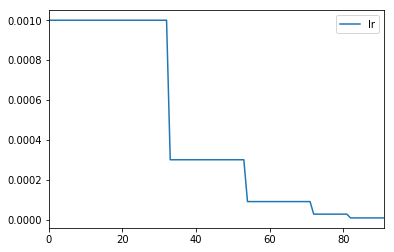

In [65]:
plot_history(nn_model_history, 'lr')

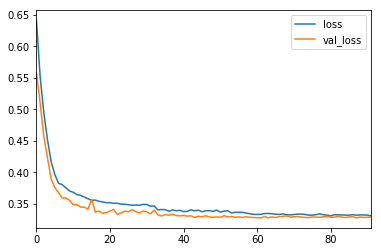

In [66]:
plot_history(nn_model_history, 'loss')

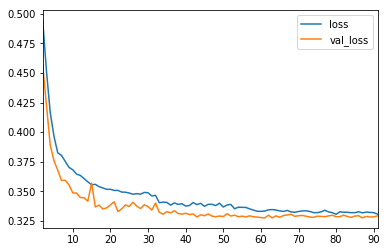

In [67]:
plot_history(nn_model_history, 'loss', 2)

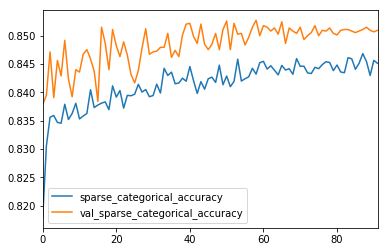

In [68]:
plot_history(nn_model_history, 'acc')

In [69]:
nn_model.evaluate(test_data, test_labels)

12211/12211 [==============================] - 1s 66us/sample - loss: 0.3341 - sparse_categorical_accuracy: 0.8428


[0.33410915186052564, 0.84276474]

**The summary of results so far**

In [70]:
results_summary.loc["nn_model", 'Accuracy score'] = nn_model.evaluate(test_data, test_labels)

12211/12211 [==============================] - 1s 61us/sample - loss: 0.3341 - sparse_categorical_accuracy: 0.8428


In [71]:
results_summary

,Accuracy score
rfc_rs,0.861436
nn_model,"[0.33410915186052564, 0.84276474]"


**4.2.2. DL Model using Embeddings**

In [0]:
def make_embedding_model(
    cat_feature_dims,
    n_cont_features,
    n_classes,
    layer_size,
    dropout_rate=0.0,
    n_layers=1,
    regularization=None,
    batch_norm=True,
):
    inputs = []
    embeddings = []
    
    for cat_feature_dim in cat_feature_dims.values():
        x = keras.layers.Input(shape=(1,))
        inputs.append(x)
        x = keras.layers.Embedding(
            cat_feature_dim,
            np.sqrt(cat_feature_dim).astype(int) + 1,
            input_length=1,
            embeddings_regularizer=keras.regularizers.l1_l2(1e-2, 1e-2),
        )(x)
        x = keras.layers.Flatten()(x)
        embeddings.append(x)
        
    cont_inputs = keras.layers.Input(shape=(n_cont_features,))
    inputs.append(cont_inputs)
    embeddings.append(cont_inputs)
    
    x = keras.layers.Concatenate()(embeddings)
        
    for _ in range(n_layers):
        if batch_norm:
            x = keras.layers.BatchNormalization()(x)
        x = keras.layers.Dense(
            layer_size,
            kernel_initializer="he_uniform",
            kernel_regularizer=regularization and keras.regularizers.l1_l2(*regularization),
        )(x)
        x = keras.layers.LeakyReLU()(x)
        x = keras.layers.Dropout(dropout_rate)(x)

    x = keras.layers.Dense(n_classes, activation="softmax")(x)
    
    return keras.Model(inputs=inputs, outputs=x)

In [0]:
embedding_model = make_embedding_model(
    cat_feature_dims,
    len(cont_cols),
    n_classes=n_classes,
    layer_size=256,
    dropout_rate=0.0,
    n_layers=3,
    regularization=None,
    batch_norm=True,
)

In [0]:
embedding_model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=[
        keras.metrics.sparse_categorical_accuracy,
    ],
)

In [0]:
emb_train_data = [train_data[x] for x in train_data[cat_cols]] + [train_data[cont_cols]]

In [77]:
PATIENCE = 10

embedding_model_history = embedding_model.fit(
    emb_train_data,
    train_labels,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        keras.callbacks.ModelCheckpoint(str(TEMP_DIR/'embedding_model.h5'), save_best_only=True),
        keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=PATIENCE),
        keras.callbacks.EarlyStopping(patience=PATIENCE * 3, restore_best_weights=True),
        keras.callbacks.TensorBoard(log_dir=str(TEMP_DIR/'embedding_model_logs')),
    ],
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 29304 samples, validate on 7327 samples
Epoch 1/100
29304/29304 [==============================] - 8s 278us/sample - loss: 0.4096 - sparse_categorical_accuracy: 0.8290 - val_loss: 0.3479 - val_sparse_categorical_accuracy: 0.8491
Epoch 2/100
29304/29304 [==============================] - 6s 222us/sample - loss: 0.3546 - sparse_categorical_accuracy: 0.8399 - val_loss: 0.3387 - val_sparse_categorical_accuracy: 0.8447
Epoch 3/100
29304/29304 [==============================] - 6s 221us/sample - loss: 0.3506 - sparse_categorical_accuracy: 0.8428 - val_loss: 0.3360 - val_sparse_categorical_accuracy: 0.8495
Epoch 4/100
29304/29304 [==============================] - 7s 228us/sample - loss: 0.3478 - sparse_categorical_accuracy: 0.8419 - val_loss: 0.3450 - val_sparse_categorical_accuracy: 0.8489
Epoch 5/100
29304/29304 [==============================] - 7s 227us/sample - loss: 0.3467 - sparse_categorical_accuracy: 0.8438 - val_loss: 0.3397 - val_sparse_categorical_accuracy: 0.8448
Epoch 

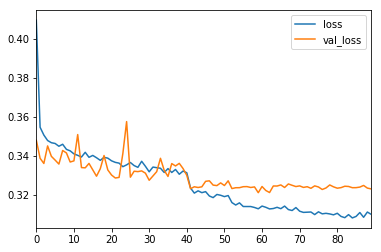

In [78]:
plot_history(embedding_model_history, 'loss')

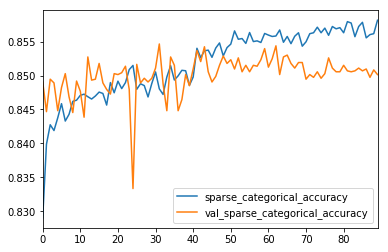

In [79]:
plot_history(embedding_model_history, 'acc')

In [0]:
emb_test_data = [test_data[x] for x in test_data[cat_cols]] + [test_data[cont_cols]]

In [84]:
results_summary.loc["nn_model_emb", 'Accuracy score'] = embedding_model.evaluate(emb_test_data, test_labels)

12211/12211 [==============================] - 1s 82us/sample - loss: 0.3233 - sparse_categorical_accuracy: 0.8513


## 5. Summary of results

In [91]:
results_summary

,Accuracy score
rfc_rs,0.861436
nn_model,"[0.33410915186052564, 0.84276474]"
nn_model_emb,"[0.3233299369823629, 0.85128164]"


The best result is demonstrated with Random Forests, to get better result with NN:
- do more hyperparameters tunning;
- use more data engineering